# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [3]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [4]:
iris = datasets.load_iris()
print(iris.DESCR) # DESCR 資料集的說明

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [5]:
# 印出iris的key值
print(iris.keys())

# 檔案位置
print(iris.filename)

# 前10筆資料
print(iris.data[0:10])

# 資料型別
print(type(iris.data))

# 樣本目標類別資料名稱
print(iris.target_names)

# 樣本目標資料
print(iris.target)

print(iris.feature_names)


dict_keys(['feature_names', 'target', 'target_names', 'data', 'DESCR', 'filename'])
/Users/maxn/opt/anaconda3/envs/statistic/lib/python3.5/site-packages/sklearn/datasets/data/iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# we only take the first two features. 

X = iris.data[:, :2]
print(X.shape)
Y = iris.target
print(Y.shape)

(150, 2)
(150,)


In [7]:
#以下是組成 pandas DataFrame (也可以不用這種做)

x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
print('target_names: ' + str(iris['target_names']))

target_names: ['setosa' 'versicolor' 'virginica']


In [9]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [10]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]
iris_data.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [11]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0, 1])]
iris_data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


## 切分訓練集與測試集
> train_test_split()

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']], iris_data[['target']], test_size=0.2 )

In [51]:
X_train.head()
X_train.shape

(80, 2)

In [52]:
X_test.head()
X_test.shape

(20, 2)

In [54]:
Y_train.head()
Y_train.shape

(80, 1)

In [55]:
Y_test.head()
Y_test.shape

(20, 1)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [59]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [71]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_x_train[:5]

# arr_y_train = np.array(Y_train)

array([[-1.20269348, -1.06642869],
       [-1.52023632, -1.06642869],
       [-0.72637923, -0.85732502],
       [ 0.5437921 ,  0.74580307],
       [ 0.22624927,  0.5366994 ]])

## use sklearn

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.4575 2.83  ]
[0.62983629 1.43469509]


In [73]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-1.20269348, -1.06642869],
       [-1.52023632, -1.06642869],
       [-0.72637923, -0.85732502],
       [ 0.5437921 ,  0.74580307],
       [ 0.22624927,  0.5366994 ]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [74]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 0.06747785  0.81550429]
 [ 1.02010635  1.30341284]
 [ 0.22624927  0.74580307]
 [ 0.22624927  1.1640104 ]
 [-0.56760782 -0.92702624]
 [-0.25006498 -0.92702624]
 [-0.56760782 -0.99672747]
 [-0.72637923 -0.99672747]
 [ 2.44904911  1.30341284]
 [-0.88515065 -0.99672747]]


you can also use fit_transform method (i.e., fit and then transform)    

In [75]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-0.03735611  0.69250212]
 [ 0.85919044  1.17008978]
 [ 0.11206832  0.62427531]
 [ 0.11206832  1.03363616]
 [-0.6350538  -1.01316812]
 [-0.33620495 -1.01316812]
 [-0.6350538  -1.08139493]
 [-0.78447822 -1.08139493]
 [ 2.20401025  1.17008978]
 [-0.93390265 -1.08139493]]


In [76]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


50.6932817223574
29.010362884957107


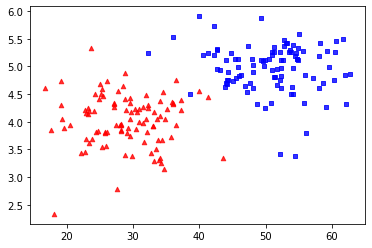

In [77]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [78]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [79]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [80]:
minmax_norm(x_val[:10])

array([0.        , 0.67892008, 0.52796226, 0.68505296, 0.19085288,
       0.59414043, 0.08868488, 1.        , 0.67511411, 0.65588372])

In [81]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[62.69579441]
[[0.56432102]
 [0.80969821]
 [0.75513861]
 [0.81191478]
 [0.6332996 ]
 [0.77905691]
 [0.59637375]
 [0.92574382]
 [0.80832265]
 [0.80137235]]
